In [1]:
#import path
import os
import numpy as np
root='AReM/'
pathDir =  os.listdir(root)
pathDir.remove('.ipynb_checkpoints')
trainingPath=[]
testPath=[]
for eachDir in pathDir[1:]:
    child = os.path.join('%s%s' % (root, eachDir))
    files= os.listdir(child+'/')
    if eachDir=='bending1' or eachDir=='bending2':
        for i in range(2):
            testPath.append(child+'/dataset'+str(i+1)+'.csv')
        for i in range(2,len(files)):
            trainingPath.append(child+'/dataset'+str(i+1)+'.csv')
    else:
        for i in range(3):
            testPath.append(child+'/dataset'+str(i+1)+'.csv')
        for i in range(3,len(files)):
            trainingPath.append(child+'/dataset'+str(i+1)+'.csv')

In [2]:
#b)save traindata
import pandas as pd
createVar=locals()
i=0
for csv in trainingPath:
    i=i+1
    data=pd.read_csv(csv,header=None,names=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'],skiprows=5)
    createVar['traindata'+str(i)]=pd.DataFrame(data)

num_train = i;


In [3]:
#save testdata
i=0
for csv in testPath:
    i=i+1
    createVar['testdata'+str(i)]=pd.read_csv(csv,header=None,names=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'],skiprows=5)
num_test = i;

In [595]:
print("c)i Some popular time-domain features: Mean, Median, Standard Deviation, Variance, Root Mean Square, Averaged derivatives, minimum, maximum etc. ")

c)i Some popular time-domain features: Mean, Median, Standard Deviation, Variance, Root Mean Square, Averaged derivatives, minimum, maximum etc. 


In [5]:
#c) ii def a function that give a row of 88*42
def give7features(td):
    td_mean = td.mean()
    td_mean_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_mean_array[0,i]=td_mean.iloc[i]

    td_max = td.max()
    td_max_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_max_array[0,i]=td_max.iloc[i]
    
    td_min = td.min()
    td_min_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_min_array[0,i]=td_min.iloc[i]
    
    td_median = td.median()
    td_median_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_median_array[0,i]=td_median.iloc[i]

    td_std = td.std()
    td_std_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_std_array[0,i]=td_std.iloc[i]
    
    td_1stquartile = td.quantile(q=0.25)
    td_1stquartile_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_1stquartile_array[0,i]=td_1stquartile.iloc[i]
    
    td_3stquartile = td.quantile(q=0.75)
    td_3stquartile_array = np.zeros(shape=(1,6))
    for i in range(6):
        td_3stquartile_array[0,i]=td_3stquartile.iloc[i]

    td_7=np.concatenate((td_min_array,td_max_array,td_mean_array,td_median_array,td_std_array,td_1stquartile_array,td_3stquartile_array),axis=0)
    
    #td_7=np.concatenate((td_min_array,td_max_array,td_mean_array,td_median_array,td_std_array,td_1stquartile_array,td_3stquartile_array),axis=1)
    return td_7.reshape([1,42],order='F')

In [6]:
#stack
dataset=np.empty(shape=[0, 42])
for i in range(num_train):
    i=i+1
    dataset = np.concatenate((dataset,give7features(createVar['traindata'+str(i)])),axis=0)
for j in range(num_test):
    j=j+1
    dataset = np.concatenate((dataset,give7features(createVar['testdata'+str(j)])),axis=0)

In [8]:
#1(c)iii extracted from time series 1, 2, and 6
index_1=[0,1,2,7,8,9,35,36,37]
extracted_1 = dataset[:,index_1]

In [9]:
temp_class_1 = np.zeros(shape=(1,88))

In [10]:
#d) i
for i in range(0,9):
    temp_class_1[0,i]=1

#for i in range(69,73):
#   temp_class_1[0,i]=1
temp_class_1 = temp_class_1.T

In [11]:
new_extrated_class=np.column_stack((extracted_1,temp_class_1))

In [12]:
new_extrated_trclass = new_extrated_class[0:69]

In [13]:
df_binary_1 = pd.DataFrame(new_extrated_trclass,columns = ['min1','max1','mean1','min2','max2','mean2','min6','max6','mean6','label'])


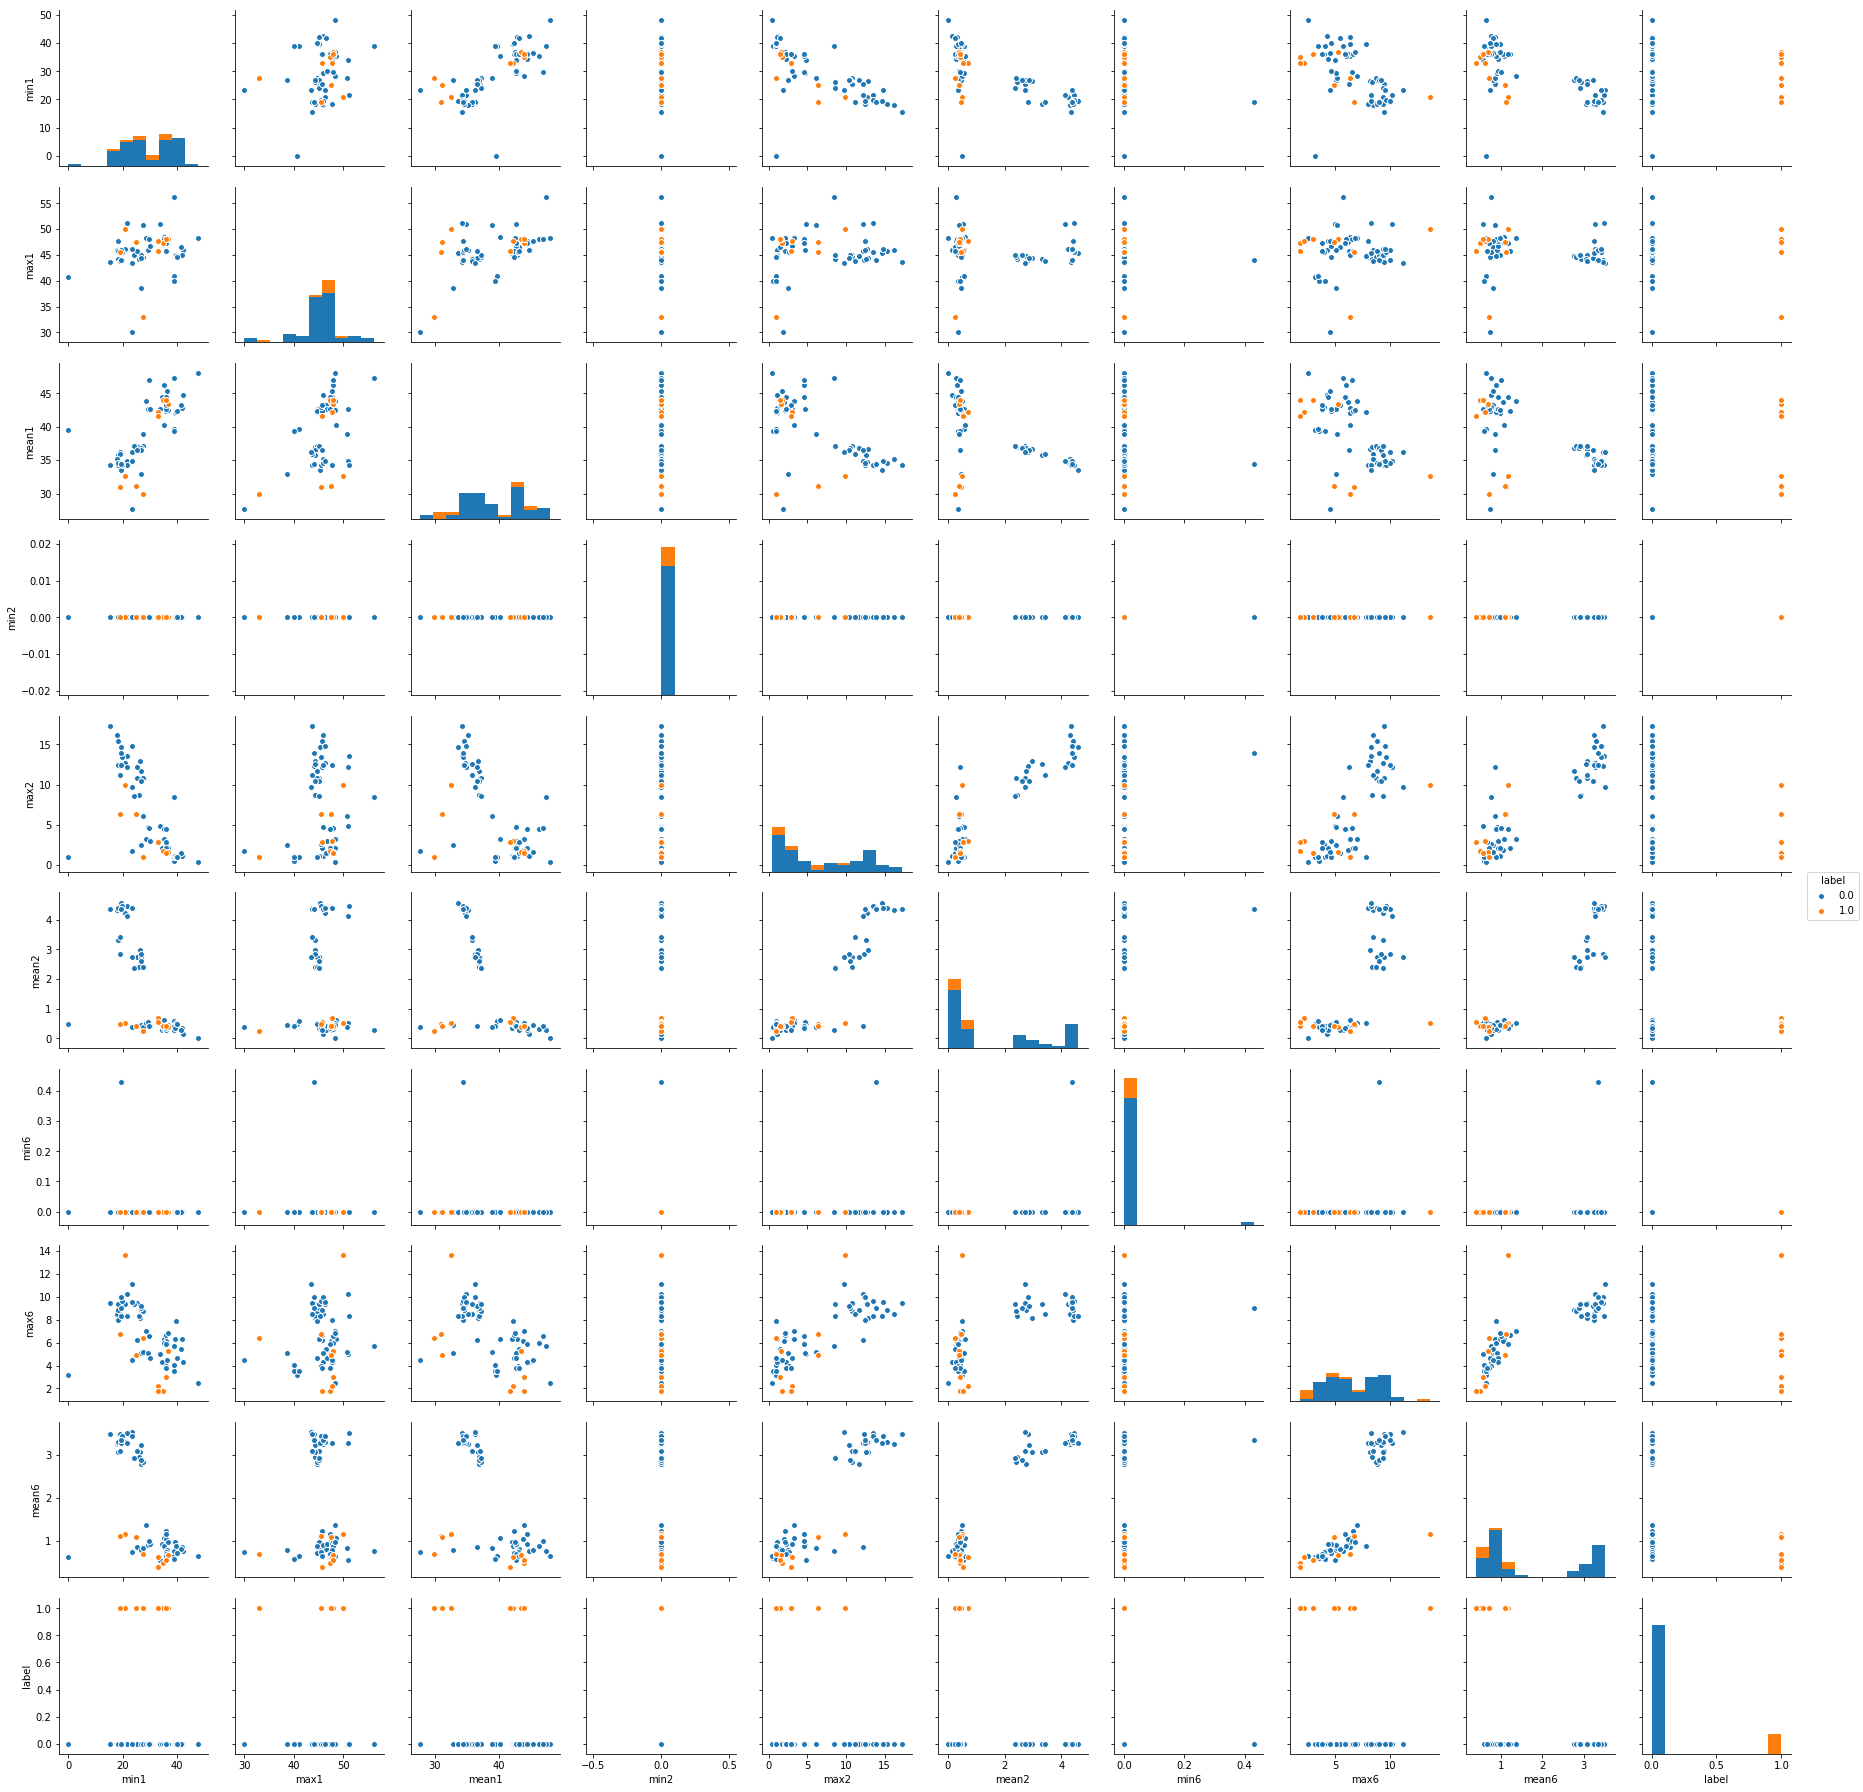

In [14]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df_binary_1, hue="label")

In [15]:
#b) ii split data into n pieces
def splitdata(td,n):
    num_row = td.iloc[:,0].size
    for c in range (n):
        c=c+1
        if(c!=n):
            createVar['traindata_s'+str(c)] = td[int(num_row/n)*(c-1):int(num_row/n)*(c)]
        else:
            createVar['traindata_s'+str(c)] = td[int(num_row/n)*(c-1):]
            
    tup=(createVar['traindata_s'+str(1)],)
    for c in range (1,n):
        c=c+1
        tup=tup+(createVar['traindata_s'+str(c)],)
    return tup    

In [16]:
for i in range(num_train):
    i=i+1
    createVar['traindata'+str(i)+'1'],createVar['traindata'+str(i)+'2'] = splitdata(createVar['traindata'+str(i)],2)   

In [17]:
#stack2
dataset_2=np.empty(shape=[0, 42])
for i in range(num_train):
    i=i+1
    dataset_2 = np.concatenate((dataset_2,give7features(createVar['traindata'+str(i)+'1'])),axis=0)
    dataset_2 = np.concatenate((dataset_2,give7features(createVar['traindata'+str(i)+'2'])),axis=0)

In [18]:
index_2=[0,1,2,7,8,9,35,36,37]
extracted_2 = dataset_2[:,index_2]

In [19]:
temp_class_2 = np.zeros(shape=(1,num_train*2))

In [20]:
for i in range(0,18):
    temp_class_2[0,i]=1

#for i in range(69,73):
#   temp_class_1[0,i]=1
temp_class_2 = temp_class_2.T

In [21]:
new_extrated_class_2=np.column_stack((extracted_2,temp_class_2))

In [22]:
df_binary_2 = pd.DataFrame(new_extrated_class_2,columns = ['min1','max1','mean1','min2','max2','mean2','min6','max6','mean6','label'])

In [23]:
df_binary_2.shape

(138, 10)

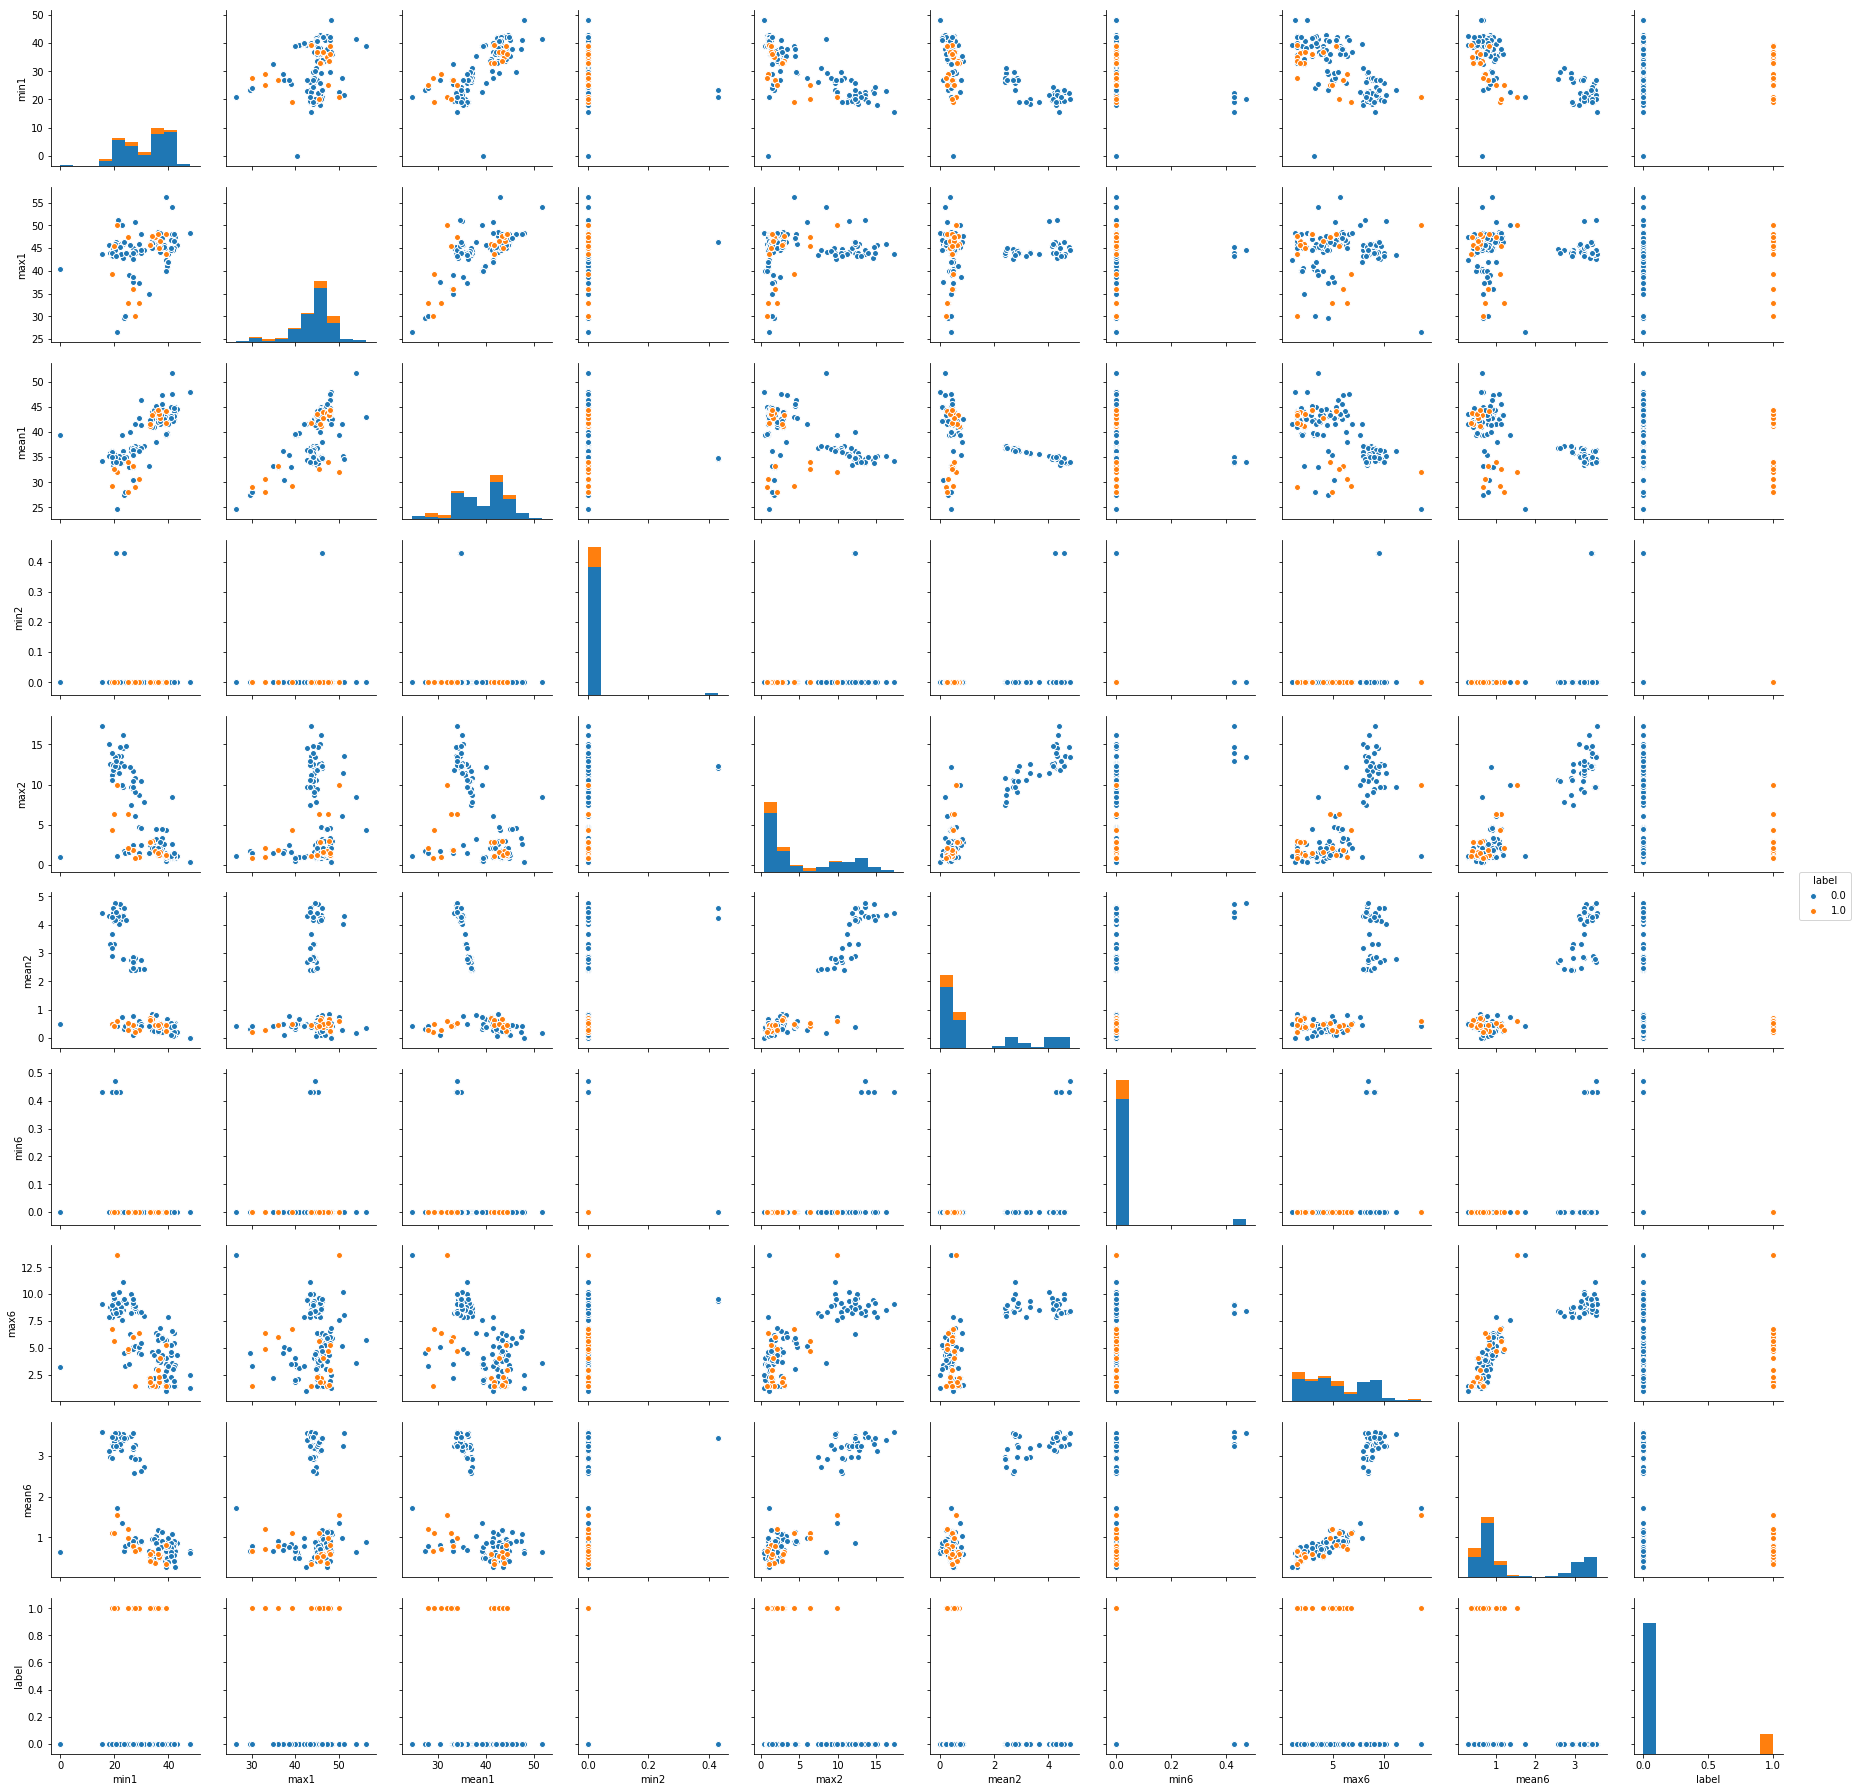

In [24]:
sns.pairplot(df_binary_2, hue="label")

In [25]:
print("Compared to d) i, the number of data increase but so as the noise")

Compared to d) i, the number of data increase but so as the noise


In [26]:
#d) iii every traindata need a empty array to store 42-feartures, n pieces n*42
for i in range(20):
    i=i+1
    createVar['dataset_'+str(i)]=np.empty(shape=[0, 42])

In [27]:
#split every train data(from traindata1 to traindata69) into n pieces, save into p1 to p69, each pi have n dataframs. p are tuples
def finaldata(n):
    for i in range(num_train):
        i=i+1
        createVar['p'+str(i)]= splitdata(createVar['traindata'+str(i)],n)  


    for i in range(num_train):
        i=i+1
        for j in range(n):
            j=j+1
            createVar['dataset_'+str(n)] = np.concatenate((createVar['dataset_'+str(n)],give7features(createVar['p'+str(i)][j-1])),axis=0)

In [28]:
for i in range(20):
    i=i+1
    finaldata(i)

In [29]:
dataset_20.shape

(1380, 42)

In [30]:
#extract features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
def featureExtract(x,y,f):
    index=[]
    model = LogisticRegression( )
    rfe = RFE(model,f)
 
    rfe = rfe.fit(x,y)
    x=rfe.support_
    for i in range(f):
        index.append(np.where(x==True)[0][i])
    return index

In [31]:
for i in range(20):
    i=i+1
    createVar['y_'+str(i)]=  np.zeros(shape=(1,69*i))
for i in range(20):
    i=i+1
    for j in range(0,9*i):
        createVar['y_'+str(i)][0,j]=1
for i in range(20):
    i=i+1        
    createVar['y_'+str(i)] = createVar['y_'+str(i)].T

In [32]:
print("fit all features")
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score
acc_42 = list()
for i in range(20):
    i=i+1
    createVar['clf_'+str(i)] = LogisticRegression(random_state = 0)
    createVar['clf_'+str(i)].fit(createVar['dataset_'+str(i)],createVar['y_'+str(i)].ravel())
    createVar['y_pred_'+str(i)]= createVar['clf_'+str(i)].predict(createVar['dataset_'+str(i)])
    createVar['test_acc_'+str(i)]=accuracy_score(createVar['y_'+str(i)],createVar['y_pred_'+str(i)])
    acc_42.append(createVar['test_acc_'+str(i)])

fit all features


In [597]:
for i in range (20):
    i=i+1
    print("the predicted class for training set when l = "+str(i)+" is:")
    print( createVar['y_pred_'+str(i)])
    print( "train accuracy when l = "+str(i)+"is:")
    print( createVar['test_acc_'+str(i)])

the predicted class for training set when l = 1 is:
[1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
train accuracy when l = 1is:
0.9420289855072463
the predicted class for training set when l = 2 is:
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
train accuracy when l = 2is:
0.9130434782608695
the predicted class for training set when l = 3 is:
[1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 

In [34]:
print("the accuracy is max when l = "+str(acc_42.index(max(acc_42))+1))
print("which is " +str(max(acc_42)))


the accuracy is max when l = 1
which is 1.0


In [35]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
f=ro.r['glm']

In [36]:
for i in range(20):
    i=i+1
    createVar['new_dataset_'+str(i)]=np.column_stack((createVar['dataset_'+str(i)],createVar['y_'+str(i)]))
    createVar['df_bi_'+str(i)] = pd.DataFrame(createVar['new_dataset_'+str(i)],columns = ['min1','max1','mean1','median1','std1','one_quartile1','th_quartile1',
                                                     'min2','max2','mean2','median2','std2','one_quartile2','th_quartile2',
                                                     'min3','max3','mean3','median3','std3','one_quartile3','th_quartile3',
                                                     'min4','max4','mean4','median4','std4','one_quartile4','th_quartile4',
                                                     'min5','max5','mean5','median5','std5','one_quartile5','th_quartile5',
                                                     'min6','max6','mean6','median6','std6','one_quartile6','th_quartile6',
                                                     'label'])

In [37]:
df_bi_1.shape

(69, 43)

In [38]:
pandas2ri.activate()
for i in range(20):
    i=i+1
    feature=createVar['df_bi_'+str(i)].columns[0:42]
    mylogit = f(formula="label~(min1+max1+mean1+median1+std1+one_quartile1+th_quartile1+min2+max2+mean2+median2+std2+one_quartile2+th_quartile2+min3+max3+mean3+median3+std3+one_quartile3+th_quartile3+min4+max4+mean4+median4+std4+one_quartile4+th_quartile4+min5+max5+mean5+median5+std5+one_quartile5+th_quartile5+min6+max6+mean6+median6+std6+one_quartile6+th_quartile6)",data=createVar['df_bi_'+str(i)],family=ro.r('binomial(link="logit")'))
    print("p values when for all features when l = " +str(i))
    print(ro.r.summary(mylogit)[-6])

p values when for all features when l = 1
                  Estimate Std. Error       z value  Pr(>|z|)
(Intercept)    -55.3749022 1722887.96 -3.214074e-05 0.9999744
min1            -0.1770208   23016.98 -7.690878e-06 0.9999939
max1            -6.7758958   97554.17 -6.945777e-05 0.9999446
mean1           40.7412300 1069233.40  3.810321e-05 0.9999696
median1          1.7412045  232545.55  7.487585e-06 0.9999940
std1            14.4090250  434499.08  3.316238e-05 0.9999735
one_quartile1  -14.3532758  406773.96 -3.528563e-05 0.9999718
th_quartile1   -23.7116311  544872.45 -4.351776e-05 0.9999653
max2            -8.6067826  125244.28 -6.871997e-05 0.9999452
mean2           10.9098357 2624698.26  4.156606e-06 0.9999967
median2         35.6546290  967273.90  3.686094e-05 0.9999706
std2           137.8060698 2342352.03  5.883235e-05 0.9999531
one_quartile2   46.9130737 1004843.26  4.668696e-05 0.9999627
th_quartile2   -77.9110596 1195469.41 -6.517194e-05 0.9999480
min3            -7.6102654  

p values when for all features when l = 8
                  Estimate   Std. Error      z value     Pr(>|z|)
(Intercept)     1.20203724    1.9539911  0.615170278 0.5384422738
min1           -0.41857579    0.1827986 -2.289819085 0.0220318063
max1            0.39130213    0.3036006  1.288871487 0.1974427683
mean1           1.03018620    1.3396873  0.768975108 0.4419080877
median1        -0.45558834    0.4445099 -1.024922882 0.3053995767
std1           -1.89204106    1.1106807 -1.703496900 0.0884751177
one_quartile1  -0.68372351    0.4446250 -1.537753061 0.1241090044
th_quartile1   -0.12085975    0.5849152 -0.206627808 0.8363005414
min2          -36.90960790 4571.6688062 -0.008073552 0.9935583071
max2            0.57984018    0.6351158  0.912967656 0.3612595525
mean2          -8.85632958    5.5593762 -1.593043769 0.1111503725
median2         0.97547284    2.1036347  0.463708288 0.6428567582
std2           -3.48029940    4.8834605 -0.712670741 0.4760495258
one_quartile2   0.15363970    1.99

p values when for all features when l = 13
                  Estimate   Std. Error     z value     Pr(>|z|)
(Intercept)     2.91224490    1.2102071  2.40640218 1.611052e-02
min1           -0.29271332    0.1573683 -1.86005314 6.287801e-02
max1            0.32497116    0.2693070  1.20669417 2.275499e-01
mean1           0.59937037    1.0718265  0.55920465 5.760221e-01
median1        -0.15373491    0.3645695 -0.42168885 6.732521e-01
std1           -1.26195397    0.8523221 -1.48060685 1.387114e-01
one_quartile1  -0.63116745    0.3507700 -1.79937704 7.195906e-02
th_quartile1   -0.09808047    0.5012321 -0.19567875 8.448616e-01
min2           -3.97469018    2.2179567 -1.79205043 7.312489e-02
max2            0.71038725    0.5441698  1.30545136 1.917392e-01
mean2          -2.14308010    4.2800635 -0.50071222 6.165737e-01
median2        -0.53798314    1.6138563 -0.33335256 7.388682e-01
std2           -4.30915249    3.3194446 -1.29815466 1.942342e-01
one_quartile2  -0.49864927    1.6099030 -0.3097

p values when for all features when l = 16
                  Estimate   Std. Error     z value     Pr(>|z|)
(Intercept)     3.39982481    1.0095284  3.36773557 7.578825e-04
min1           -0.39691592    0.1627760 -2.43841785 1.475171e-02
max1            0.23804543    0.2872731  0.82863818 4.073092e-01
mean1           0.69586120    1.0077426  0.69051484 4.898705e-01
median1        -0.10655118    0.2939041 -0.36253720 7.169506e-01
std1           -1.50508890    0.8812654 -1.70787240 8.766002e-02
one_quartile1  -0.65238261    0.3258890 -2.00185518 4.530031e-02
th_quartile1   -0.02835256    0.4400501 -0.06443030 9.486276e-01
min2           -3.71521882    1.6198234 -2.29359504 2.181377e-02
max2            0.44107631    0.5345281  0.82516954 4.092753e-01
mean2           4.95184907    3.8872209  1.27387899 2.027063e-01
median2        -0.50296172    1.1431376 -0.43998355 6.599490e-01
std2           -3.55657423    2.9089314 -1.22263944 2.214659e-01
one_quartile2  -2.84189705    1.5137704 -1.8773

p values when for all features when l = 20
                 Estimate Std. Error    z value     Pr(>|z|)
(Intercept)    3.15789080  0.8564960  3.6869883 2.269238e-04
min1          -0.59349891  0.2418174 -2.4543270 1.411485e-02
max1           0.86374044  0.3007262  2.8721820 4.076481e-03
mean1         -1.20725992  1.1905338 -1.0140493 3.105592e-01
median1        0.12667870  0.3383544  0.3743965 7.081093e-01
std1          -2.94077313  0.9617952 -3.0575876 2.231264e-03
one_quartile1 -0.34961042  0.3624966 -0.9644516 3.348196e-01
th_quartile1   0.93556506  0.4803269  1.9477672 5.144282e-02
min2          -1.78849141  1.2505777 -1.4301322 1.526791e-01
max2           1.03111895  0.5927190  1.7396422 8.192186e-02
mean2          1.99063618  3.8785456  0.5132430 6.077814e-01
median2       -2.26759035  1.2828202 -1.7676603 7.711772e-02
std2          -6.32748221  2.8506652 -2.2196512 2.644246e-02
one_quartile2 -2.54485520  1.4627267 -1.7398023 8.189374e-02
th_quartile2   1.11168020  1.2218164  0.90

In [39]:
#index_2=[0,1,2,7,8,9,35,36,37]
for i in range(20):
    i=i+1
    createVar['pse_9'+str(i)] = createVar['dataset_'+str(i)][:,index_2]
    createVar['pse_new_dataset_'+str(i)]=np.column_stack((createVar['pse_9'+str(i)],createVar['y_'+str(i)]))
    createVar['pse_df_bi_'+str(i)] = pd.DataFrame(createVar['pse_new_dataset_'+str(i)],columns = ['min1','max1','mean1','min2','max2','mean2','min6','max6','mean6','label'])

In [40]:
pse_acc_9 = list()
for i in range(20):
    i=i+1
    createVar['pse_clf_'+str(i)] = LogisticRegression(random_state = 0)
    createVar['pse_clf_'+str(i)].fit( createVar['pse_9'+str(i)],createVar['y_'+str(i)].ravel())
    createVar['pse_y_pred_'+str(i)]= createVar['pse_clf_'+str(i)].predict(createVar['pse_9'+str(i)])
    createVar['pse_test_acc_'+str(i)]=accuracy_score(createVar['y_'+str(i)],createVar['pse_y_pred_'+str(i)])
    pse_acc_9.append(createVar['pse_test_acc_'+str(i)])

In [41]:
for i in range (20):
    i=i+1
    print("use the selected 9 features in d)i, the predicted class for training set when l = "+str(i)+"is:")
    print( createVar['pse_y_pred_'+str(i)])
    print( "test accuracy when l = "+str(i)+"is:")
    print( createVar['pse_test_acc_'+str(i)])

use the selected 9 features in d)i, the predicted class for training set when l = 1is:
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
test accuracy when l = 1is:
0.8840579710144928
use the selected 9 features in d)i, the predicted class for training set when l = 2is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
test accuracy when l = 2is:
0.8840579710144928
use the selected 9 features in d)i, the predicted class for training set when l = 3is:
[0. 0. 0. 0. 

In [42]:
print("Using the selected 9 features, the accuracy is max when l = "+str(pse_acc_9 .index(max(pse_acc_9 ))+1))
print("which is " +str(max(pse_acc_9 )))

Using the selected 9 features, the accuracy is max when l = 1
which is 0.8840579710144928


In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [601]:
import warnings
warnings.filterwarnings('ignore')

In [602]:
#assuem select 10 features, use cv to determine the best l with best 10 features
score_report = list()
for l in range(20):
    l=l+1
    train_X =  createVar['df_bi_'+str(l)].iloc[:,0:-1]
    train_Y =  createVar['df_bi_'+str(l)]['label']
    model=LogisticRegression()
    cv=StratifiedKFold(n_splits=5,shuffle=False)
    scorelist = list()
    k=0
    for train_id, cv_id in cv.split(train_X,train_Y):
        k=k+1
        createVar['train_id_'+str(l)+'_'+str(k)]=train_id
        x_train_k, X_cv = train_X.loc[train_id], train_X.loc[cv_id]
        y_train_k, y_cv = train_Y.loc[train_id], train_Y.loc[cv_id]
        rfe=RFE(model,10)
        rfe=rfe.fit(x_train_k,y_train_k)
        createVar['sf_list_'+str(l)+'_'+str(k)]=list()
        for i in range(len(rfe.support_)):
            if rfe.support_[i]==True:
                createVar['sf_list_'+str(l)+'_'+str(k)].append(i)
        y_predict=model.fit(x_train_k[x_train_k.columns[ createVar['sf_list_'+str(l)+'_'+str(k)]]], y_train_k).predict(X_cv[X_cv.columns[ createVar['sf_list_'+str(l)+'_'+str(k)]]])
        scorelist.append(f1_score(y_cv, y_predict,average = 'weighted'))
    #print(l,scorelist)
    score_report.append(scorelist)

In [603]:
idx=0
mx=0
for i in range(20):
    a = np.mean(score_report[i])
    if mx < a :
        mx=a
        idx=i
    else:
        continue

In [604]:
idx2=0
mx=0
for i in range(5):
    a=score_report[idx][i]
    if mx < a :
        mx=a
        idx2=i
    else:
        continue
    

In [606]:
print("by using 5-folds, the accuracy reach max when l ="+str(idx+1))



by using 5-folds, the accuracy reach max when l =1


In [639]:
score_report[0]

[0.9180952380952382,
 0.6938775510204083,
 0.8571428571428571,
 0.9180952380952382,
 0.8776223776223776]

In [608]:
for i in range(5):
    i=i+1
    print(createVar['signif_list_'+str(1)+'_'+str(i)])

[6, 8, 14, 15, 18, 20, 29, 32, 33, 34]
[0, 3, 6, 8, 14, 15, 19, 20, 29, 33]
[6, 8, 14, 19, 20, 22, 28, 29, 31, 33]
[6, 14, 15, 18, 19, 20, 28, 29, 33, 36]
[1, 6, 8, 14, 15, 19, 20, 28, 29, 33]


In [609]:
idx2=idx2+1
idx=idx+1

In [610]:
best_features=createVar['signif_list_'+str(idx)+'_'+str(idx2)]

In [611]:
best_features

[6, 8, 14, 15, 18, 20, 29, 32, 33, 34]

In [54]:
col=['min1','max1','mean1','median1','std1','one_quartile1','th_quartile1',
                                                     'min2','max2','mean2','median2','std2','one_quartile2','th_quartile2',
                                                     'min3','max3','mean3','median3','std3','one_quartile3','th_quartile3',
                                                     'min4','max4','mean4','median4','std4','one_quartile4','th_quartile4',
                                                     'min5','max5','mean5','median5','std5','one_quartile5','th_quartile5',
                                                     'min6','max6','mean6','median6','std6','one_quartile6','th_quartile6',
                                      ]


In [614]:
print("the best features are:")
for i in range(10):
    print(col[best_features[i]])

the best features are:
th_quartile1
max2
min3
max3
std3
th_quartile3
max5
std5
one_quartile5
th_quartile5


In [619]:
# extract best_features from the best l 

df_10 = dataset_1[:,best_features]
df_new_dataset_10 = np.column_stack((df_10 ,y_1))
df_b_10 = pd.DataFrame(df_new_dataset_10,columns = ['th_quartile1','max2','min3','max3','std3','th_quartile3','max5','std5','one_quartile5','th_quartile5','label'])
    
acc_10 = list()

clf = LogisticRegression(random_state = 0)
clf.fit(df_10,y_1.ravel())
y_pred_10= clf.predict(df_10)
acc_10 =accuracy_score(y_1,y_pred_10)



In [620]:
print("the accuracy of the moldel when train acuuracy is maximum is: "+str(acc_10))

the accuracy of the moldel when train acuuracy is maximum is: 0.9420289855072463


In [621]:
print("the predicted classification is:")
print(y_pred_10)

the predicted classification is:
[1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [622]:
print("Apparently, the accuracy calculated by the right way is bigger than which calculated by the wrong way. Thus we can't determin how many features and what features before using cross validation to determin the best l, we should use cross validation to find the best features.") 


Apparently, the accuracy calculated by the right way is bigger than which calculated by the wrong way. Thus we can't determin how many features and what features before using cross validation to determin the best l, we should use cross validation to find the best features.


In [60]:
#d)iv every testdata need a empty array to store 42-feartures, n pieces n*42
for i in range(20):
    i=i+1
    createVar['dataset2_'+str(i)]=np.empty(shape=[0, 42])

In [61]:
#split every test data(from 1 to 19) into n pieces, save into q1 to q19, each qi have n dataframs. q are tuples
def finaldata2(n):
    for i in range(num_test):
        i=i+1
        createVar['q'+str(i)]= splitdata(createVar['testdata'+str(i)],n)  


    for i in range(num_test):
        i=i+1
        for j in range(n):
            j=j+1
            createVar['dataset2_'+str(n)] = np.concatenate((createVar['dataset2_'+str(n)],give7features(createVar['q'+str(i)][j-1])),axis=0)

In [62]:
for i in range(20):
    i=i+1
    finaldata2(i)

In [625]:
t_1=  np.zeros(shape=(1,19))
for i in range(0,4):
    t_1[0,i]=1
t_1 = t_1.T

In [624]:
from sklearn.metrics import confusion_matrix
print("the confusion matrix for train data:")
confusion_matrix(y_1, y_pred_10)


the confusion matrix for train data:


array([[59,  1],
       [ 3,  6]])

In [627]:
print("the confusion matrix for test data:")
confusion_matrix(t_1, clf.fit(df_10,y_1.ravel()).predict(dataset2_1[:,best_features]))

the confusion matrix for test data:


array([[15,  0],
       [ 0,  4]])

In [628]:
from ggplot import *
from sklearn import metrics


In [629]:
probs = clf.predict_proba(df_10)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_1, preds)
roc_auc = metrics.auc(fpr, tpr)

In [630]:
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))

ROC for train data:


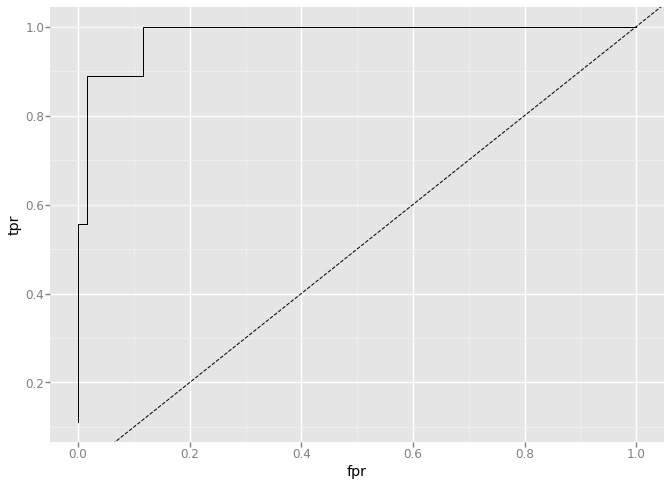

<ggplot: (7024630571)>

In [635]:
print("ROC for train data:")
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [636]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_1, clf.decision_function(df_10))
print("auc for train data is "+str(auc))
                   

auc for train data is 0.9814814814814814


In [70]:
df_2_dataset_10 = np.column_stack((df_10 ,y_1))
df_b2_10 = pd.DataFrame(df_2_dataset_10,columns = ['th_quartile1','max2','min3','max3','std3','th_quartile3','max5','std5','one_quartile5','th_quartile5','label'])

In [71]:
print("Refit with pruned set of features:")

import statsmodels.api as sm     
y=df_b_10['label']
x=pd.DataFrame(df_b_10,columns=['th_quartile1','max2','min3','max3','std3','th_quartile3','max5','std5','one_quartile5','th_quartile5'])
                                                     
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print("summary",result.summary2())

Refit with pruned set of features:
Optimization terminated successfully.
         Current function value: 0.097756
         Iterations 13
summary                         Results: Logit
Model:              Logit            No. Iterations:   13.0000
Dependent Variable: label            Pseudo R-squared: 0.748  
Date:               2018-07-01 12:56 AIC:              33.4903
No. Observations:   69               BIC:              55.8314
Df Model:           9                Log-Likelihood:   -6.7452
Df Residuals:       59               LL-Null:          -26.718
Converged:          1.0000           Scale:            1.0000 
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------
th_quartile1    -0.9523   0.6642 -1.4337 0.1516 -2.2541 0.3495
max2            -1.2553   1.1157 -1.1252 0.2605 -3.4420 0.9313
min3            -0.6225   0.4145 -1.5017 0.1332 -1.4350 0.1

In [637]:
#d)v 
x_test = dataset2_1[:,best_features]
clf.fit(df_10,y_1.ravel())
y_pr=clf.predict(x_test)
test_acc=accuracy_score(t_1,y_pr)
print("the predicted result in test set are " ,y_pr)

the predicted result in test set are  [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [641]:
print("test accuracy is: ",test_acc)
print("test accuracy is bigger than the max cross validation accuracy which is "+str(max(score_report[0])))

test accuracy is:  1.0
test accuracy is bigger than the max cross validation accuracy which is 0.9180952380952382


In [74]:
#d)vi
print("if i choose 10 features, no well-separated occured")

if i choose 10 features, no well-separated occured


In [643]:
#d)vii
print("the confusion matrix from train data:")
print(confusion_matrix(y_1, y_pred_10))
print("it's imbalanced due to the class'0' is even more than 5 times of class'1'")

the confusion matrix from train data:
[[59  1]
 [ 3  6]]
it's imbalanced due to the class'0' is even more than 5 times of class'1'


In [644]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE 

In [645]:
xt, xv, yt,yv =train_test_split(df_10,y_1,test_size =.1,random_state=12)

In [646]:
sm=SMOTE(random_state=12,ratio=1.0)
xt_r,yt_r=sm.fit_sample(xt,yt.ravel())

In [647]:
log2=LogisticRegression()
log2.fit(xt_r,yt_r)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [648]:
print("test accuracy when applying SMOTE is: ",accuracy_score(y_1,log2.predict(df_10)))

test accuracy when applying SMOTE is:  0.9565217391304348


In [649]:
print("the confusion matrix from train data after SMOTE:")
confusion_matrix(y_1, log2.predict(df_10))

the confusion matrix from train data after SMOTE:


array([[57,  3],
       [ 0,  9]])

In [650]:
log2.predict(dataset2_1[:,best_features])

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

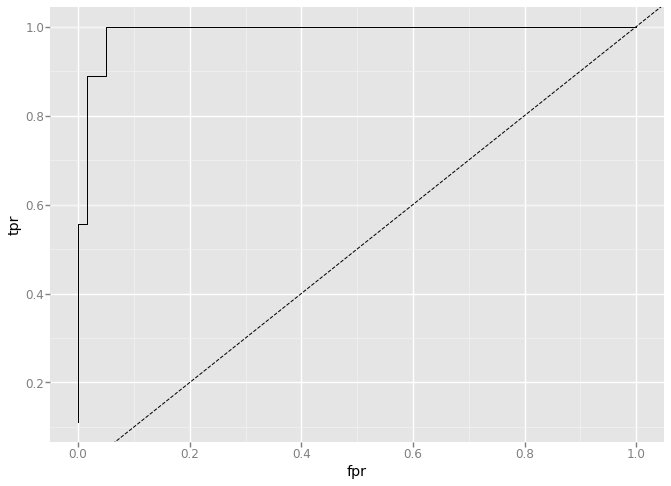

<ggplot: (7565875895)>

In [651]:
probs = log2.predict_proba(dataset_1[:,best_features])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_1, preds)
roc_auc = metrics.auc(fpr, tpr)
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [653]:
auc2=roc_auc_score(y_1, log2.decision_function(df_10))
print("auc after SMOTE is "+str(auc2))
                   

auc after SMOTE is 0.9888888888888888


In [95]:
#e)i
from sklearn import preprocessing
import numpy as np
for i in range(20):  
    i=i+1
    createVar['dataset_norm_'+str(i)] = preprocessing.scale(createVar['dataset_'+str(i)])

In [160]:
for i in range(20):  
    i=i+1
    createVar['dataset2_norm_'+str(i)] = preprocessing.scale(createVar['dataset2_'+str(i)])

In [189]:
for i in range(20):
    i=i+1
    createVar['t_'+str(i)]=  np.zeros(shape=(1,19*i))
for i in range(20):
    i=i+1
    for j in range(0,4*i):
        createVar['t_'+str(i)][0,j]=1
for i in range(20):
    i=i+1        
    createVar['t_'+str(i)] = createVar['t_'+str(i)].T

In [654]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split,KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [289]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.cross_validation import cross_val_score
from sklearn import model_selection

In [655]:
score_report = list()
for l in range(20):
    l=l+1
    train_X =  createVar['dataset_norm_'+str(l)]
    train_Y =  createVar['y_'+str(l)]
    model=LogisticRegressionCV(penalty='l1', solver='liblinear',max_iter=200)
    scores = model_selection.cross_val_score(model, train_X,train_Y.ravel(), cv=5)
    score_report.append(np.mean(scores))

In [657]:
score_report

[0.8703296703296702,
 0.8341269841269842,
 0.8696864111498257,
 0.855064935064935,
 0.8376811594202899,
 0.8382603585071996,
 0.838659793814433,
 0.8514004914004915,
 0.8340903225806452,
 0.8565217391304347,
 0.8550975949808295,
 0.8527053669222344,
 0.8561638733705772,
 0.8509160835425458,
 0.8492753623188406,
 0.852373508844097,
 0.855100927441353,
 0.8478138359891177,
 0.8504832670594723,
 0.8550724637681159]

In [658]:
print("Using L1-penalized logistic regression, the best l is: ",score_report.index(max(score_report))+1)

Using L1-penalized logistic regression, the best l is:  1


In [659]:
train_X =  createVar['dataset_'+str(score_report.index(max(score_report))+1)]
train_Y =  createVar['y_'+str(score_report.index(max(score_report))+1)]
model=LogisticRegressionCV(penalty='l1', solver='liblinear')
y_pred=model.fit(train_X ,train_Y.ravel()).predict(createVar['dataset2_'+str(score_report.index(max(score_report))+1)])
print("The accuracy when use L1 penalty to classify 2 classes is :",accuracy_score( createVar['t_'+str(score_report.index(max(score_report))+1)], y_pred))

The accuracy when use L1 penalty to classify 2 classes is : 1.0


In [660]:
print("Compared to p-value selection, L1 perform better. Because in previous method, it is almost impossible to do cross validation for all possible combinations of different amount of features, however, using L1, it can somehow check all possibilities and give the same result as p-value do.")
      

Compared to p-value selection, L1 perform better. Because in previous method, it is almost impossible to do cross validation for all possible combinations of different amount of features, however, using L1, it can somehow check all possibilities and give the same result as p-value do.


In [370]:
for i in range(69):
    i=i+1
    createVar['ym_'+str(i)]=  np.zeros(shape=(1,69*i))
for i in range(20):
    i=i+1
    for j in range(0,5*i):
        createVar['ym_'+str(i)][0,j]=1
    for j in range(5*i,9*i):
        createVar['ym_'+str(i)][0,j]=2
    for j in range(9*i,21*i):
        createVar['ym_'+str(i)][0,j]=3
    for j in range(21*i,33*i):
        createVar['ym_'+str(i)][0,j]=4  
    for j in range(33*i,45*i):
        createVar['ym_'+str(i)][0,j]=5
    for j in range(45*i,57*i):
        createVar['ym_'+str(i)][0,j]=6
    for j in range(57*i,69*i):
        createVar['ym_'+str(i)][0,j]=7
for i in range(20):
    i=i+1        
    createVar['ym_'+str(i)] = createVar['ym_'+str(i)].T

In [371]:
for i in range(20):
    i=i+1
    createVar['tm_'+str(i)]=  np.zeros(shape=(1,19*i))
for i in range(20):
    i=i+1
    for j in range(0,2*i):
        createVar['tm_'+str(i)][0,j]=1
    for j in range(2*i,4*i):
        createVar['tm_'+str(i)][0,j]=2
    for j in range(4*i,7*i):
        createVar['tm_'+str(i)][0,j]=3
    for j in range(7*i,10*i):
        createVar['tm_'+str(i)][0,j]=4  
    for j in range(10*i,13*i):
        createVar['tm_'+str(i)][0,j]=5
    for j in range(13*i,16*i):
        createVar['tm_'+str(i)][0,j]=6
    for j in range(16*i,19*i):
        createVar['tm_'+str(i)][0,j]=7
for i in range(20):
    i=i+1        
    createVar['tm_'+str(i)] = createVar['tm_'+str(i)].T

In [530]:
score_report2 = list()
for l in range(20):
    l=l+1
    train_X =  createVar['dataset_norm_'+str(l)]
    train_Y =  createVar['ym_'+str(l)]
    model2=LogisticRegressionCV(penalty='l1', solver='saga',multi_class='multinomial')
    scores = model_selection.cross_val_score(model, train_X,train_Y.ravel(), cv=4)
    score_report2.append(np.mean(scores))
    print (l)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [661]:
score_report2

[0.5081699346405228,
 0.49264705882352944,
 0.4686085972850679,
 0.4891304347826087,
 0.5333132852178563,
 0.475658140403286,
 0.4223829201101928,
 0.5072463768115941,
 0.47336641852770883,
 0.4825077295335394,
 0.4545182400445559,
 0.4070048309178744,
 0.40251984126984125,
 0.4202573642879188,
 0.4280177187153932,
 0.4003623188405797,
 0.4058415174943698,
 0.4266958821698994,
 0.4698198702170508,
 0.40072463768115946]

In [662]:
print("Using L1-penalized logistic regression to classifiy 6 classes, the best l is: ",score_report2.index(max(score_report2))+1)

Using L1-penalized logistic regression to classifiy 6 classes, the best l is:  5


In [683]:
train_X =  createVar['dataset_'+str(score_report2.index(max(score_report2))+1)]
train_Y =  createVar['ym_'+str(score_report2.index(max(score_report2))+1)]

model2=LogisticRegressionCV(penalty='l1', solver='saga',multi_class='multinomial')

y_true= createVar['tm_'+str(score_report2.index(max(score_report2))+1)]
y_pred=model2.fit(train_X ,train_Y.ravel()).predict(createVar['dataset2_'+str(score_report2.index(max(score_report2))+1)])
y_score=model2.predict_proba(createVar['dataset2_'+str(score_report2.index(max(score_report2))+1)])

print("The accuracy when use L1 penalty to classify 6 classes is :",accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print ("classification_report(left: labels):")
print (confusion_matrix(y_true,y_pred))



The accuracy when use L1 penalty to classify 6 classes is : 0.7473684210526316
classification_report(left: labels):
[[ 6  1  3  0  0  0  0]
 [ 1  3  2  0  3  0  1]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 12  1  2  0]
 [ 0  0  0  2 11  2  0]
 [ 0  0  0  2  4  9  0]
 [ 0  0  0  0  0  0 15]]


In [664]:
n_classes=7
from scipy import interp
from sklearn.metrics import roc_curve, auc

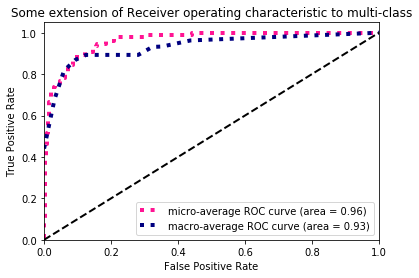

In [701]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y_true, classes=[1,2,3,4,5,6,7])
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

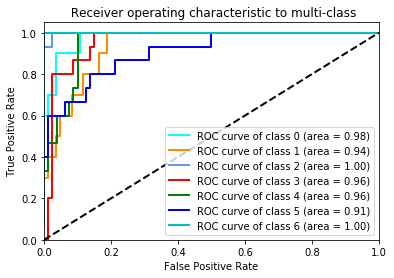

In [685]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','r','g','b','c'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [686]:
score_report3 = list()
from sklearn.naive_bayes import GaussianNB
for l in range(20):
    l=l+1
    train_X =  createVar['dataset_norm_'+str(l)]
    train_Y =  createVar['ym_'+str(l)]
    gnb = GaussianNB()
    scores = model_selection.cross_val_score(gnb , train_X,train_Y.ravel(), cv=4)
    score_report3.append(np.mean(scores))

In [687]:
score_report3

[0.6086601307189543,
 0.5802521008403362,
 0.5462858220211162,
 0.5652173913043479,
 0.5853047313552526,
 0.5553584764749813,
 0.5630337465564739,
 0.5489130434782608,
 0.5153122415219189,
 0.5200631805350182,
 0.5559245335561125,
 0.5289855072463768,
 0.5227777777777778,
 0.4999142690579884,
 0.526499506150669,
 0.5181159420289855,
 0.4969439994427805,
 0.51202676070947,
 0.5369280040277468,
 0.5130434782608696]

In [688]:
print("Using Gausian Naive Bayes to classifiy 6 classes, the best l is: ",score_report3.index(max(score_report3))+1)

Using Gausian Naive Bayes to classifiy 6 classes, the best l is:  1


In [689]:
train_X =  createVar['dataset_'+str(score_report3.index(max(score_report3))+1)]
train_Y =  createVar['ym_'+str(score_report3.index(max(score_report3))+1)]
gnb = GaussianNB()
y_true3=createVar['tm_'+str(score_report3.index(max(score_report3))+1)]
y_pred3=gnb.fit(train_X ,train_Y.ravel()).predict(createVar['dataset2_'+str(score_report3.index(max(score_report3))+1)])

y_score3=gnb.predict_proba(createVar['dataset2_'+str(score_report3.index(max(score_report3))+1)])

print("The accuracy when use Gausian Naive Bayes'to classify 6 classes is :",accuracy_score(y_true3, y_pred3))

The accuracy when use Gausian Naive Bayes'to classify 6 classes is : 0.8947368421052632


In [690]:
print ("classification_report(left: labels):")
print (confusion_matrix(y_true3,y_pred3))

classification_report(left: labels):
[[2 0 0 0 0 0 0]
 [0 1 0 1 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


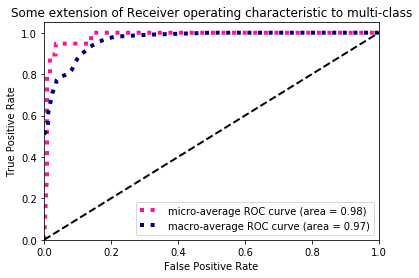

In [691]:
from sklearn.preprocessing import label_binarize
y3 = label_binarize(y_true3, classes=[1,2,3,4,5,6,7])
fpr["micro"], tpr["micro"], _ = roc_curve(y3.ravel(), y_score3.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

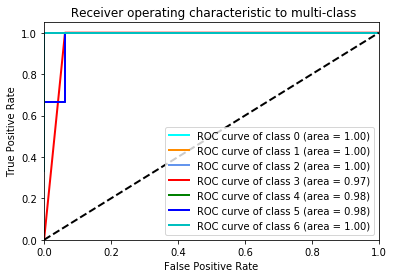

In [692]:
from sklearn.preprocessing import label_binarize
y3 = label_binarize(y_true3, classes=[1,2,3,4,5,6,7])


from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y3[:, i], y_score3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','r','g','b','c'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [693]:
from sklearn.naive_bayes import MultinomialNB
score_report4 = list()
for l in range(20):
    l=l+1
    train_X =  createVar['dataset_'+str(l)]
    train_Y =  createVar['ym_'+str(l)]
    mnb = MultinomialNB()
    #y_pred = gnb.fit(createVar['dataset_norm_'+str(l)], createVar['ym_'+str(i)]).predict(createVar['dataset_norm_'+str(l))
    scores = model_selection.cross_val_score(mnb , train_X,train_Y.ravel(), cv=5)
    score_report4.append(np.mean(scores))




In [694]:
score_report4

[0.4639928698752228,
 0.47431998286571,
 0.46007423117709445,
 0.47277444273814506,
 0.4608695652173913,
 0.4592728969279357,
 0.47116329274874447,
 0.4569510824237589,
 0.46276147299769355,
 0.4666666666666667,
 0.4691318467200693,
 0.45013696322090535,
 0.46306967820464884,
 0.4556291828472279,
 0.44734299516908216,
 0.4576096892822731,
 0.45584753602282885,
 0.45605043255261013,
 0.46481895887556257,
 0.455072463768116]

In [695]:
print("Using  multinomial Naive Bayes to classifiy 6 classes, the best l is: ",score_report4.index(max(score_report4))+1)

Using  multinomial Naive Bayes to classifiy 6 classes, the best l is:  2


In [696]:
train_X =  createVar['dataset_'+str(score_report4.index(max(score_report4))+1)]
train_Y =  createVar['ym_'+str(score_report4.index(max(score_report4))+1)]
mnb = MultinomialNB()
y_true4=createVar['tm_'+str(score_report4.index(max(score_report4))+1)]
y_pred4=mnb.fit(train_X ,train_Y.ravel()).predict(createVar['dataset2_'+str(score_report4.index(max(score_report4))+1)])
y_score4=gnb.predict_proba(createVar['dataset2_'+str(score_report4.index(max(score_report4))+1)])

print("The accuracy when use Gausian Naive Bayes multinomial to classify 6 classes is :",accuracy_score(y_true4, y_pred4))

The accuracy when use Gausian Naive Bayes multinomial to classify 6 classes is : 0.7105263157894737


In [697]:
print ("classification_report(left: labels):")
print (confusion_matrix(y_true4,y_pred4))

classification_report(left: labels):
[[4 0 0 0 0 0 0]
 [2 1 1 0 0 0 0]
 [0 0 5 0 0 0 1]
 [0 0 0 2 1 3 0]
 [0 0 0 1 4 1 0]
 [0 0 0 1 0 5 0]
 [0 0 0 0 0 0 6]]


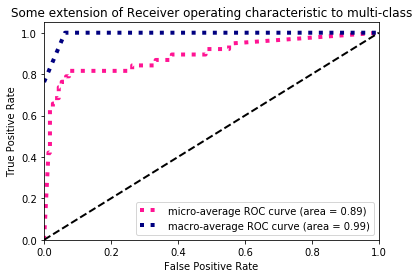

In [698]:
from sklearn.preprocessing import label_binarize
y4= label_binarize(y_true4, classes=[1,2,3,4,5,6,7])
fpr["micro"], tpr["micro"], _ = roc_curve(y4.ravel(), y_score4.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

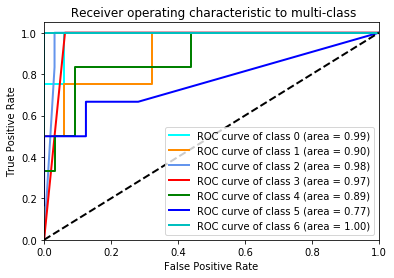

In [699]:
from sklearn.preprocessing import label_binarize
y4 = label_binarize(y_true4, classes=[1,2,3,4,5,6,7])


from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y4[:, i], y_score4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','r','g','b','c'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [703]:
print("Based on the data, using Gausian Naive Bayes is the best way in this problem because the test accuracy is the highest and also computational friendly")

Based on the data, using Gausian Naive Bayes is the best way in this problem because the test accuracy is the highest and also computational friendly
